In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import math
from scipy.optimize import curve_fit

In [2]:
# radius of circle
radius= 0.5;
# centre of circle
x = 0.5;
y = 0.5;  

#squared domain
xMin=0;
xMax=1;
yMin=0;
yMax=1;
xDelta=xMax - xMin;
yDelta=yMax - yMin;
areasquare= xDelta * yDelta;

In [3]:
#poisson parameters
lam=10000;

#poisson process on square
M=np.random.poisson(lam * areasquare);
xx = xDelta * np.random.uniform(0, 1, M) + xMin;  # x coordinates of Poisson points
yy = yDelta * np.random.uniform(0, 1, M) + yMin;  # y coordinates of Poisson points
print(M)

10011


In [4]:
colors=[]
#ci mettiamo i vari valori di Pi
estimates_pi = []
# Initialize an empty list to store the sample standard deviations
sample_std_devs = []
pii=[]

def inside(a,b, cols):
    outside_count = 0
    inside_count = 0
    for i in range(len(a)):
        c = ((a[i]-x)**2 + (b[i]-y)**2) 
        if (c < radius**2 ):
            inside_count += 1
            cols.append('red')
        else:
            outside_count += 1
            cols.append('blue')
        pi=4*(inside_count/(outside_count+inside_count))
        pii.append(pi)
    #print(pii)
    return inside_count, outside_count, cols
    
    #plt.plot(densities, sample_std_devs, marker='o')
    #plt.xlabel('Density (λ)')
    #plt.ylabel('Sample Standard Deviation')
    #plt.title('Sample Standard Deviation vs Density')
    #plt.show()
    #print(sample_std_devs, estimates_pi)
    return inside_count, outside_count, cols

<Figure size 72x72 with 0 Axes>

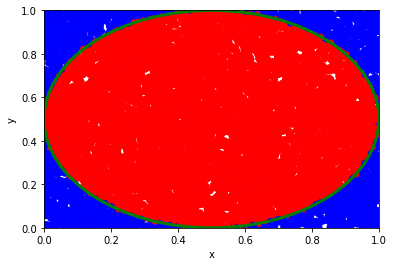

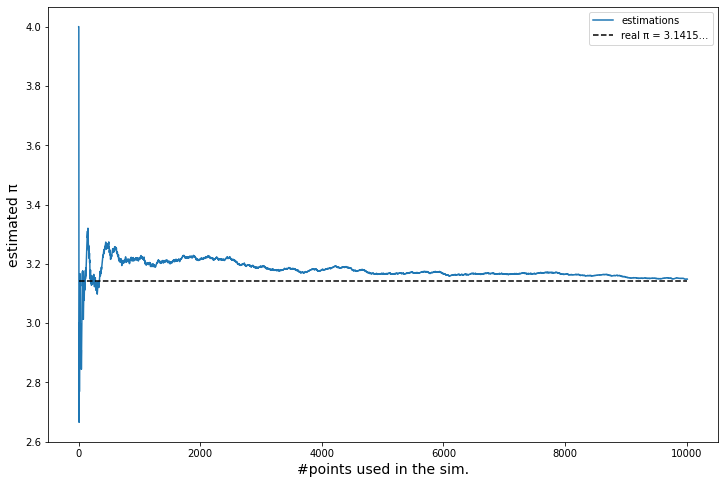

In [5]:
#call function with fixed value of lambda
inside_count, outside_count, colors = inside(xx,yy, colors)

#plotting the result
plt.figure(figsize=(xDelta, yDelta))
fig, ax = plt.subplots()
ax.scatter(xx, yy, c=colors)
plt.xlim(0, 1)
plt.ylim(0, 1)
circle = plt.Circle((0.5,0.5), radius, edgecolor='green', facecolor='none', linewidth=3)
ax.add_artist(circle)
square = plt.Rectangle((0,0), xDelta, yDelta, edgecolor='red', facecolor='none')
plt.xlabel('x');
plt.ylabel('y');

fig, ax = plt.subplots()
ax.plot(range(1,M+1), pii, label='estimations')
ax.plot((0, M+1), (np.pi, np.pi), color='black', linestyle='dashed', label='real π = 3.1415...')
ax.set_xlabel("#points used in the sim.", fontsize=14)
ax.set_ylabel("estimated π", fontsize=14)
plt.legend()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.show()

OBSEVATION: As the value of λ increases, the approximate value of π tends to get closer to the true value of π, which is approximately 3.14159. This is because higher values of λ correspond to generating more random points within the square Λ, leading to a denser sampling.

In the Monte Carlo method, the estimated value of π is calculated based on the proportion of points that fall within the unit circle out of the total generated points. When λ is larger, there are more points being generated, increasing the likelihood of capturing points within the unit circle.

As a result, the estimated value of π becomes more accurate and approaches the true value of π as λ grows. This is due to the law of large numbers, which states that as the number of trials (in this case, the number of generated points) increases, the average value (in this case, the estimated value of π) converges to the true expected value.

In [6]:
#how many points inside/outside the the circle?
print("number of points inside the circle:", inside_count)
print("number of points inside the circle:", outside_count)
print("total number of points:", inside_count+outside_count) 


number of points inside the circle: 7880
number of points inside the circle: 2131
total number of points: 10011


In [7]:
#calculating Pi
pi=4*(inside_count/(outside_count+inside_count))
print(pi)

3.1485366097292977


1)How does the approximate value of π depends on λ? Perform the analysis for densities of the form
λ = 5k, with k ∈ {1,2,...,10} (integer numbers from 1 to 10).

1 6
12 23
33 107
124 470
689 2512
3308 12221
16801 61286
83918 306792
419928 1535572
2095831 7670862


<Figure size 72x72 with 0 Axes>

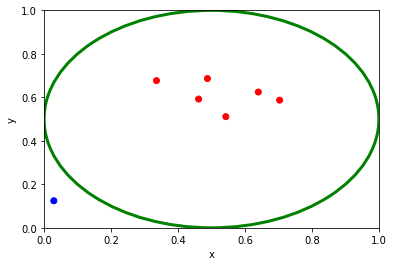

<Figure size 72x72 with 0 Axes>

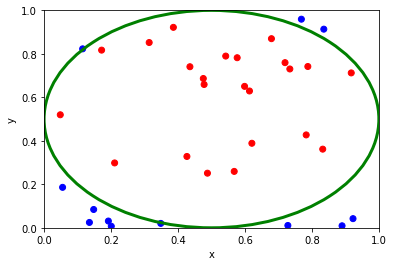

<Figure size 72x72 with 0 Axes>

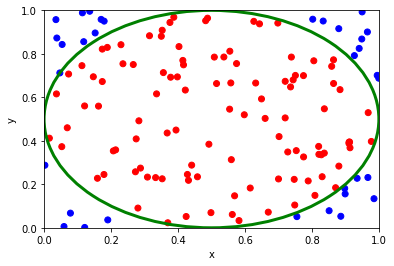

<Figure size 72x72 with 0 Axes>

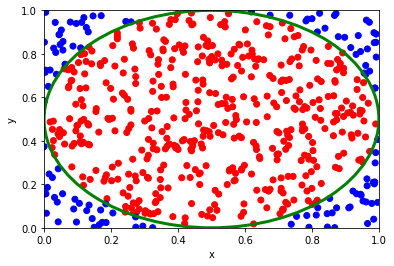

<Figure size 72x72 with 0 Axes>

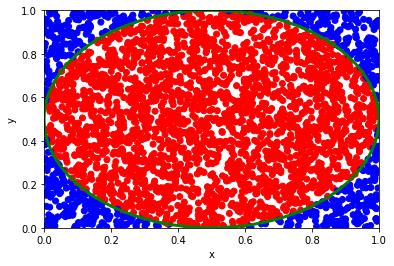

<Figure size 72x72 with 0 Axes>

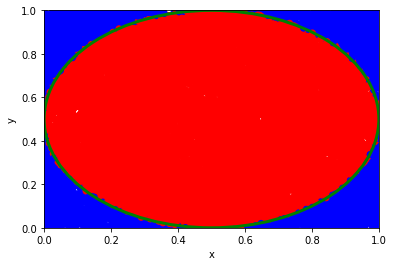

<Figure size 72x72 with 0 Axes>

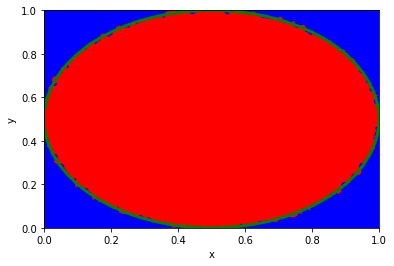

<Figure size 72x72 with 0 Axes>

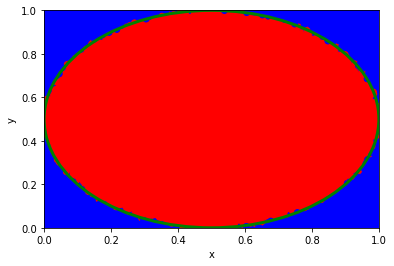

<Figure size 72x72 with 0 Axes>

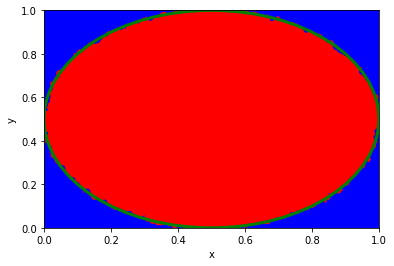

<Figure size 72x72 with 0 Axes>

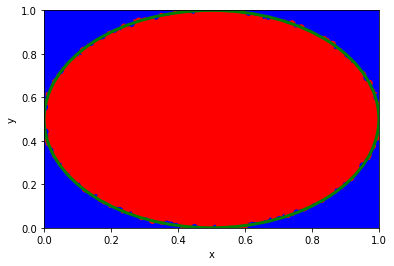

In [8]:
lambda_values = []

k = range(1,11)
for i in range(0, 10):
    lambd=5**k[i]
    
    lambda_values.append(lambd) #save density values in lambda values
    
    numbPoints=np.random.poisson(lambd * areasquare);
    xx = xDelta * np.random.uniform(0, 1, numbPoints) + xMin;  # x coordinates of Poisson points
    yy = yDelta * np.random.uniform(0, 1, numbPoints) + yMin;  # y coordinates of Poisson points
    
    colors=[]

    inside_count, outside_count, colors = inside(xx,yy, colors)
    
    print(outside_count,inside_count)
    estimate_pi = 4*(inside_count/(outside_count+inside_count))
    estimates_pi.append(estimate_pi)
    sample_std_dev = np.std(estimates_pi)
    sample_std_devs.append(sample_std_dev)
    #print(lambda_values)
    #print(sample_std_devs)
    #print(estimates_pi)
    
    plt.figure(figsize=(xDelta, yDelta))
    fig, ax = plt.subplots()
    ax.scatter(xx, yy, c=colors)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    circle = plt.Circle((0.5,0.5), radius, edgecolor='green', facecolor='none', linewidth=3)
    ax.add_artist(circle)
    square = plt.Rectangle((0,0), xDelta, yDelta, edgecolor='red', facecolor='none')
    plt.xlabel('x');
    plt.ylabel('y');

2)How does the standard deviation depends on λ? Show that the sample standard deviation decreases to zero roughly as c/λ^(1/2) , for some constant c > 0. Perform the analysis for densities of the form λ = 5k, with k ∈ {1,2,...,10} (integer numbers from 1 to 10)

In [15]:
#create a new array where we appen the value c/λ^(1/2) for every λ
c=1
result=[]
k_values = range(1, 11)
densities = [5 ** k for k in k_values]

for density in range(1,11):
    res=c/density**(1/2)
    result.append(res)
print(result)

[5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125, 9765625]
1
2
3
4
5
6
7
8
9
10
[1.0, 0.7071067811865475, 0.5773502691896258, 0.5, 0.4472135954999579, 0.4082482904638631, 0.3779644730092272, 0.35355339059327373, 0.3333333333333333, 0.31622776601683794]


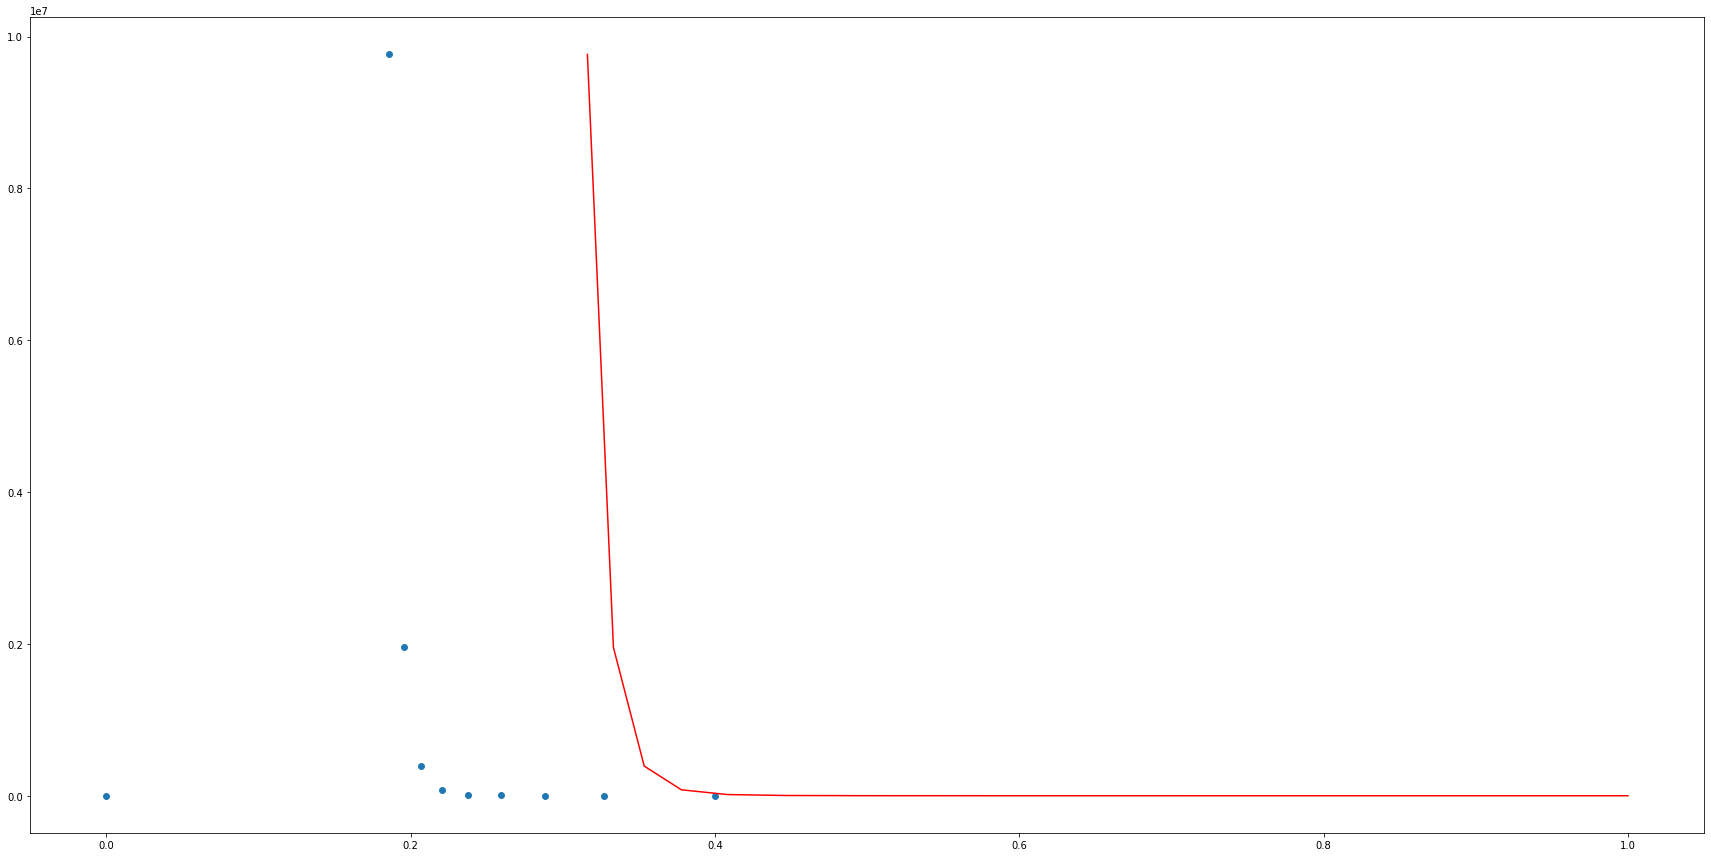

In [21]:
#plotting both the standard deviation and c/λ^(1/2) to see the the replationship between them
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot()
ax.plot(result, densities, label='estimations', color='red')
ax.scatter(sample_std_devs, densities, s = 35, label = 'Area method')

Observation: as λ increases, the sample standard deviation decreases. This indicates that as we generate more points (higher density), the estimates of π become more precise and have less variability.